In [2]:
!pip install git+https://github.com/qubvel/classification_models.git


  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-8x7b4uoq
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-8x7b4uoq
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.0 MB/s eta 0:00:00
  Created wheel for image_classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20029 sha256=0a07448aed8a6facf79ba039e9f708720ab70f93b50e7cd516472250a0093640
  Stored in directory: /tmp/pip-ephem-wheel-cache-72x9ctz9/wheels/f5/13/cb/b1dbd79043c5a389742e422859b0b663adcd7b5c220928c339
Successfully built image_classifiers


In [3]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from classification_models.keras import Classifiers  # Importing ResNet18 from classification_models
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

ResNet18, preprocess_input = Classifiers.get('resnet18')



In [4]:
def create_resnet18_model():
    # Load ResNet18 without the top layer (ImageNet weights can be used, but here we use None)
    base_model = ResNet18(weights=None, include_top=False, input_shape=(32, 32, 3))

    # Adding custom top layers
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)  # CIFAR-10 has 10 classes

    # Defining the model
    model = Model(inputs=base_model.input, outputs=output)
    return model


In [5]:
from tensorflow.keras.datasets import cifar10

# Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Adding the preprocessing function here
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Using 20% of training data for validation
)

# Training and validating generators
train_generator = datagen.flow(x_train, y_train, batch_size=32, subset='training')
val_generator = datagen.flow(x_train, y_train, batch_size=32, subset='validation')


# Checking the shapes of training and test sets just to make sure the dataset has been downloaded successfully
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [6]:
def create_mobilenet_model():
    # Loading MobileNet without the top layer
    base_model = tf.keras.applications.MobileNet(weights=None, include_top=False, input_shape=(32, 32, 3))

    # Adding custom top layers
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)

    # Defining the model
    model = Model(inputs=base_model.input, outputs=output)
    return model


In [7]:
# Compile and train ResNet-18 with Adam optimizer and learning rate 0.001
model_resnet = create_resnet18_model()
model_resnet.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

#Compile and train MobileNet with SGD optimizer and learning rate 0.01
model_mobilenet = create_mobilenet_model()
model_mobilenet.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Trainning the model
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.2981 - loss: 1.9552 - val_accuracy: 0.4542 - val_loss: 1.4997
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.4472 - loss: 1.5454 - val_accuracy: 0.4834 - val_loss: 1.7134
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.5237 - loss: 1.3619 - val_accuracy: 0.5630 - val_loss: 1.2309
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.5716 - loss: 1.2563 - val_accuracy: 0.6066 - val_loss: 1.1172
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.6141 - loss: 1.1494 - val_accuracy: 0.6511 - val_loss: 0.9943
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.6426 - loss: 1.0648 - val_accuracy: 0.6876 - val_loss: 0.8972
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.6633 - loss: 1.0002 - val_accuracy: 0.6938 - val_loss: 0.8736
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.6854 - loss: 0.95

313/313 - 1s - 3ms/step - accuracy: 0.7566 - loss: 0.7766
Test Accuracy of ResNet-18: 0.756600022315979
313/313 - 1s - 3ms/step - accuracy: 0.6121 - loss: 1.0927
Test Accuracy of MobileNet: 0.6121000051498413


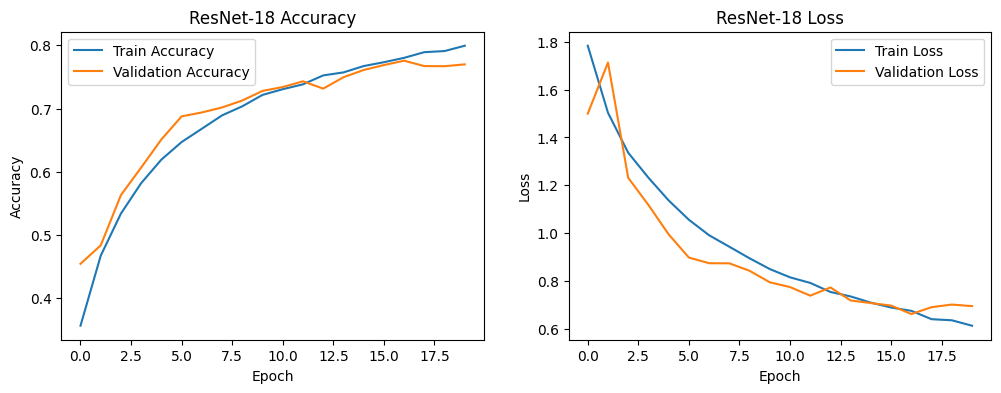

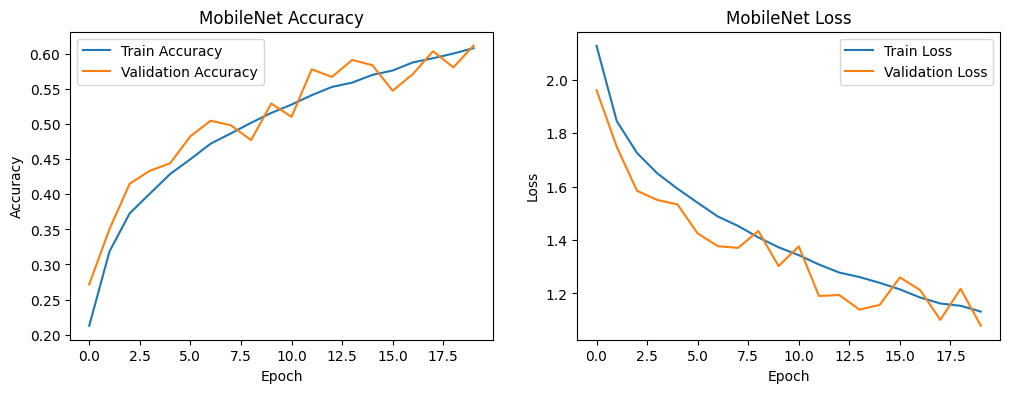

In [8]:
 # Evaluating the ResNet-18 model
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy of ResNet-18:", test_acc_resnet)

# Evaluating the MobileNet model
test_loss_mobilenet, test_acc_mobilenet = model_mobilenet.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy of MobileNet:", test_acc_mobilenet)

# Plotting the training & validation accuracy and loss for ResNet-18
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet-18 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet-18 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Plotting for MobileNet
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNet Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNet Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
